### Search

#### Initial setup

Import appropriate libraries, read in the CSV, delete unnecessary columns, and sort by total volume

In [1]:
# pandas setup
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time

In [2]:
# read in csv
search_df=pd.read_csv("search.csv")

#remove irrelevant columns
search_df.drop(search_df.columns[[12,13,14,15]], axis=1, inplace=True)
search_df.head(10)
search_df['total_volume'] = search_df.sum(axis=1)

# display first 10 rows
search_df.head(10)

,trend,january,february,march,april,may,june,july,august,september,october,november,total_volume
0,duchesse satin gown,0,0,0,0,0,0,0,0,0,0,0,0
1,saksutopia,0,0,0,0,0,0,0,0,0,0,0,0
2,oscars2016,0,0,0,0,0,0,0,0,0,0,0,0
3,studded apparel,10,10,10,10,0,10,10,10,10,10,0,90
4,pompon charm,0,0,0,0,0,0,0,0,0,0,0,0
5,cfdaawards,10,10,10,10,390,10,10,10,10,10,0,480
6,billboardmusicawards,10,10,140,1000,30,20,10,10,10,10,10,1260
7,wool crepe jacket,10,20,20,20,20,10,10,30,20,10,10,180
8,foil gown,140,50,10,10,10,10,10,10,10,10,10,280
9,loose cut trousers,0,0,20,10,10,10,10,10,10,10,10,100


In [3]:
# sort the df by total_volume
sorted_search_df = search_df.sort('total_volume', ascending=True)

sorted_search_df.head(10)

,trend,january,february,march,april,may,june,july,august,september,october,november,total_volume
0,duchesse satin gown,0,0,0,0,0,0,0,0,0,0,0,0
5620,nordstromyvr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5618,pleated long skirt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5489,hanbang mask pack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5490,mens braided melt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5494,cold shoulder mock neck top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5495,cherry red sequin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5623,patent gown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5498,twin cake pact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5502,wrap front gown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# get stats on search volume
sorted_search_df['total_volume'].describe()

count    5.656000e+03
mean     1.228152e+06
std      6.786063e+06
min      0.000000e+00
25%      9.605000e+03
50%      6.405000e+04
75%      3.817000e+05
max      2.794000e+08
Name: total_volume, dtype: float64

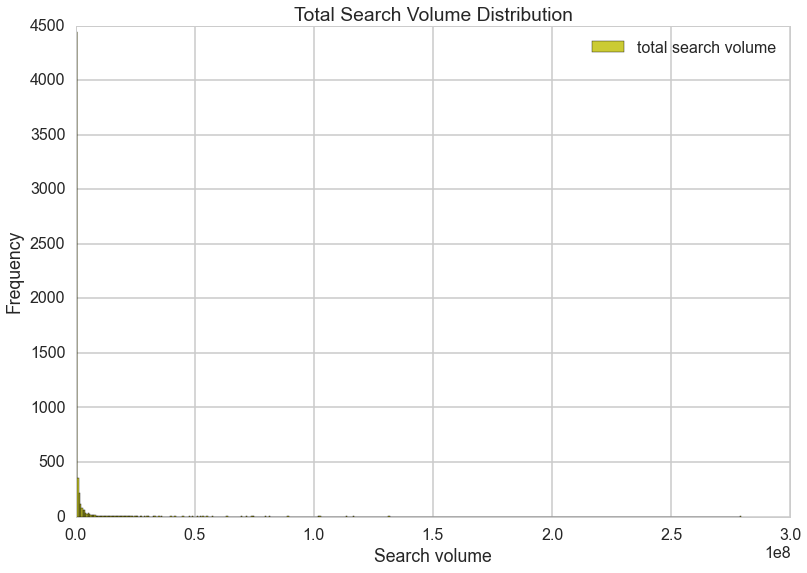

In [5]:
# plot what this looks like
total_volume=np.array(sorted_search_df.total_volume)
plt.figure()
plt.hist(total_volume, alpha=.8, color='y', bins=500, label="total search volume")
plt.xlabel('Search volume')
plt.ylabel('Frequency')
plt.title('Total Search Volume Distribution')
plt.legend()
plt.show()

Looks like there are a ton of searches with very little volume, and very few searches with a ton of volume (which sees to make sense)

## What's the difference between NaN and 0 search volume?

### Another way to do this is to do comparisons...

### Finding insignificant searches

Keep track of whether there are insignificant searches

In [6]:
# get the bottom 5 percentile in terms of search volume
low_search_value = sorted_search_df.total_volume.quantile(0.05)
print "low search value:" + str(low_search_value)
# create new df with low searches
low_search_df = sorted_search_df[sorted_search_df.total_volume < low_search_value]
low_search_df.head(10)

low search value:367.5


,trend,january,february,march,april,may,june,july,august,september,october,november,total_volume
0,duchesse satin gown,0,0,0,0,0,0,0,0,0,0,0,0
5620,nordstromyvr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5618,pleated long skirt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5489,hanbang mask pack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5490,mens braided melt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5494,cold shoulder mock neck top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5495,cherry red sequin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5623,patent gown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5498,twin cake pact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5502,wrap front gown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [85]:
# save work to a csv file
low_search_df.to_csv('lowsearch.csv')

### Classify these insignificant searches

Is it a hashtag? Is it a term that just retailers use? We can look at social buzz and retail distribution to give us more insight. We can also double check to make sure our customers aren't searching for these terms.
<img src="flow.png" width="500">

#### Do they have social buzz?

Determine whether these have social buzz

In [54]:
import requests
import json
import urllib

In [74]:
# gets total number of posts
# for now just gets the associated json
def get_social_buzz(term):
    
    # base API endpoint url
    base_url = "https://api.trendalytics.co/v1/brand/posts/latest?brand=&limit=50&order=desc&period=2016-03-21:2016-04-19&platform=facebook,pinterest,twitter,instagram,tumblr&q="
    # convert term like 'pink wedding dress' to 'pink+wedding+dress'
    encoded_term = urllib.quote_plus(term)
    base_end_url = "&sort=total"
    url = base_url + encoded_term + base_end_url
    
    # set authorization
    headers = {'authorization': 'NGRiZmUzMzktZTg4Ny00MTE4LWIyNzgtZTcwNWQxYjE3NzZmOnZWRDBPLzVDR3FCWllGQUtSZnphWVBDNWJJdz0='}
     
    # get response
    response = requests.get(url, headers=headers)
    response_json = json.loads(response.text)
    
    # get the number of total posts from response json
    total_posts = 0
    for platform_stats in response_json["facets"]["platformStatsFacet"]["terms"]:
        platform_total_posts = platform_stats["total_count"]
        total_posts = total_posts + platform_total_posts

    return total_posts

In [78]:
# get total posts from all with low social
social_buzz = []
for term in low_search_df["trend"]:
    total_posts = get_social_buzz(term)
    social_buzz.append(total_posts)

In [81]:
# low_search_df.drop('social_buzz', 1)

In [82]:
# add the social buzz column
low_search_df.loc[:,'social_buzz'] = social_buzz
# sort the df by total_volume
sorted_social_df = low_search_df.sort('social_buzz', ascending=True)
sorted_social_df.head(5)

,trend,january,february,march,april,may,june,july,august,september,october,november,total_volume,social_buzz
5358,mixed media satchel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
130,crocodile embossed bag,0,0,0,0,0,0,0,0,0,30,40,70,0
104,cable knit nail,0,0,0,0,0,0,0,0,0,50,30,80,0
17,levis womens denim,0,0,0,0,0,0,0,40,30,10,10,90,0
34,extreme spread collar dress shirt,0,10,10,0,10,10,10,10,10,10,10,90,0


interestingly enough, looks like the majority of these with no search volume actually don't have any social media buzz either

In [84]:
sorted_social_df["social_buzz"].describe()

count    283.000000
mean      10.929329
std       67.298599
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      896.000000
Name: social_buzz, dtype: float64

to graph what this looks like

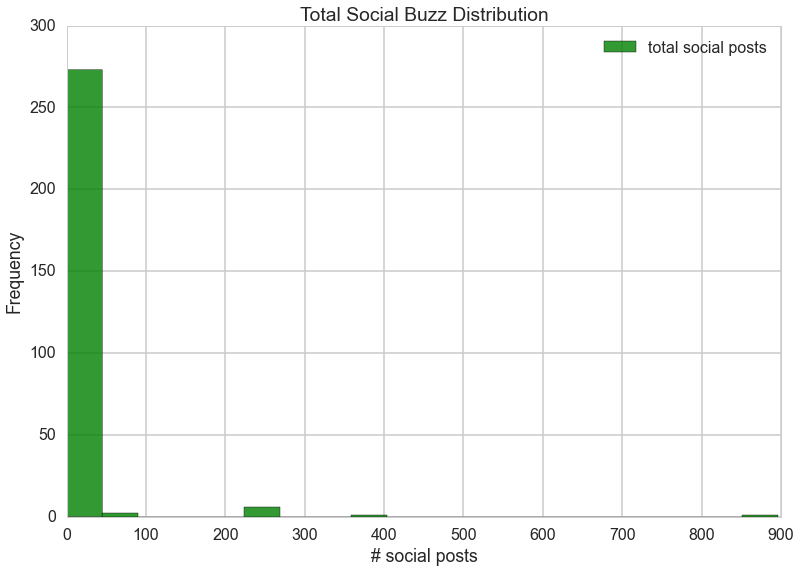

In [112]:
# plot what this looks like
total_social=np.array(sorted_social_df.social_buzz)
plt.figure()
plt.hist(total_social, alpha=.8, color='g', bins=20, label="total social posts")
plt.xlabel('# social posts')
plt.ylabel('Frequency')
plt.title('Total Social Buzz Distribution')
plt.legend()
plt.show()

The majority of our terms with low search volume, also have low social buzz (according to the stats below, literally 81%!) 
### Eventually need a more sophisticated mechanism for figuring out whether the other 19% are hashtags or not

In [156]:
# get the bottom 5 percentile in terms of social volume
low_social_value = sorted_social_df.social_buzz.quantile(0.81)
print "low social value:" + str(low_social_value)
# create new df with low social
low_social_df = sorted_social_df[sorted_social_df.social_buzz <= low_social_value]
low_social_df.head(10)

low social value:0.0


,trend,january,february,march,april,may,june,july,august,september,october,november,total_volume,social_buzz
5358,mixed media satchel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
130,crocodile embossed bag,0,0,0,0,0,0,0,0,0,30,40,70,0
104,cable knit nail,0,0,0,0,0,0,0,0,0,50,30,80,0
17,levis womens denim,0,0,0,0,0,0,0,40,30,10,10,90,0
34,extreme spread collar dress shirt,0,10,10,0,10,10,10,10,10,10,10,90,0
3,studded apparel,10,10,10,10,0,10,10,10,10,10,0,90,0
152,skinny tapered pants,0,0,0,0,0,0,0,0,20,30,50,100,0
9,loose cut trousers,0,0,20,10,10,10,10,10,10,10,10,100,0
5361,chaturanga pant,10,10,10,10,10,10,10,10,10,10,NaN,100,0
32,mkshanghai,10,10,10,10,10,10,10,10,10,10,10,110,0


Looks like there are 155 terms that have no search volume and have literally no social buzz

In [157]:
len(low_social_df)

231

In [159]:
# save work and export to csv
low_social_df.to_csv('lowsocial.csv')

#### Do the have retail distribution?

Look at products on the market with ShopStyle's API to see if there is retail distribution

In [160]:
def get_retail_distribution(term):
    
    # base API endpoint url
    base_url = 'http://api.shopstyle.com/api/v2/products?filters=Category%2CBrand%2CRetailer%2CPrice%2CDiscount%2CSize%2CColor%2CDeal&fts='
    # convert term like 'pink wedding dress' to 'pink+wedding+dress'
    encoded_term = urllib.quote_plus(term)
    base_end_url = '&pid=shopstyle'
    url = base_url + encoded_term + base_end_url
    
    # get response
    response = requests.get(url)
    response_json = json.loads(response.text)
    
    # get # total products
    total_products = response_json['metadata']['total']

    return total_products

In [161]:
# total_products = get_retail_distribution('precision lip brush')
# print total_products

In [162]:
# get the retail distribution for all terms
retail_distribution = []
for term in low_social_df["trend"]:
    total_products = get_retail_distribution(term)
    retail_distribution.append(total_products)

In [163]:
# add the social buzz column
low_social_df.loc[:,'retail_distribution'] = retail_distribution
# sort the df by total_volume
sorted_retail_df = low_social_df.sort('retail_distribution', ascending=True)
sorted_retail_df.head(5)

,trend,january,february,march,april,may,june,july,august,september,october,november,total_volume,social_buzz,retail_distribution
5412,100gala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
5190,aircushion pact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
5344,nextootd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
5346,waterblend print,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
5347,nosebum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [164]:
sorted_retail_df["retail_distribution"].describe()

count      231.000000
mean      1179.389610
std       5282.766752
min          0.000000
25%          6.000000
50%         31.000000
75%        184.500000
max      57672.000000
Name: retail_distribution, dtype: float64

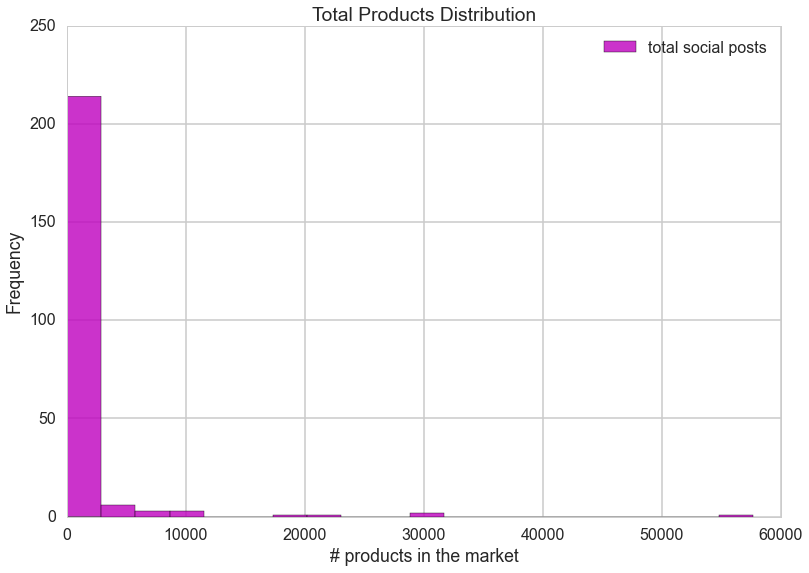

In [165]:
# plot what this looks like
total_retail=np.array(sorted_retail_df.retail_distribution)
plt.figure()
plt.hist(total_retail, alpha=.8, color='m', bins=20, label="total social posts")
plt.xlabel('# products in the market')
plt.ylabel('Frequency')
plt.title('Total Products Distribution')
plt.legend()
plt.show()

again we see this sort of reversed exponential distribution.
### Again, we'll have to figure out an appropriate threshold here

In [195]:
# get the bottom 5 percentile in terms of social volume
low_retail_value = sorted_retail_df.retail_distribution.quantile(0.50)
print "low retail value:" + str(low_retail_value)
# create new df with low retail
low_retail_df = sorted_retail_df[sorted_retail_df.retail_distribution <= low_retail_value]
low_retail_df.drop(low_retail_df.columns[[1,2,3,4,5,6,7,8,9,10,11]], axis=1, inplace=True)
low_retail_df.head(10)

low retail value:31.0


/Users/eden/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,trend,total_volume,social_buzz,retail_distribution
5412,100gala,0,0,0
5190,aircushion pact,0,0,0
5344,nextootd,0,0,0
5346,waterblend print,0,0,0
5347,nosebum,0,0,0
5450,watersnake booties,0,0,0
5642,cfdanyfw,0,0,0
5356,jinseng pack,0,0,0
5191,tati coltier,0,0,0
5362,cfdaswarovski,0,0,0


all the above should be examples of terms we can take out completely. the total number of unnecessary terms (low search, no social buzz, low retail distribution)

In [196]:
len(low_retail_df)

116

In [197]:
low_retail_df['total_volume'].describe()

count    116.000000
mean      85.172414
std      118.662714
min        0.000000
25%        0.000000
50%        0.000000
75%      180.000000
max      360.000000
Name: total_volume, dtype: float64

In [198]:
low_retail_df['social_buzz'].describe()

count    116
mean       0
std        0
min        0
25%        0
50%        0
75%        0
max        0
Name: social_buzz, dtype: float64

In [199]:
low_retail_df['retail_distribution'].describe()

count    116.000000
mean       8.551724
std        9.102646
min        0.000000
25%        0.000000
50%        6.000000
75%       14.000000
max       31.000000
Name: retail_distribution, dtype: float64

In [200]:
low_retail_df.to_csv('lowretail.csv')

### Tag these terms as either significant or not
Add a "Useless" column that is True for terms that are useless and False for terms that are not

In [201]:
# testing this 
url = 'https://app.trendalytics.co/api/v1/api/v2/products?filters=Category%2CBrand%2CRetailer%2CPrice%2CDiscount%2CSize%2CColor%2CDeal&fts=metro%2Bpant&fl=b174'
response = requests.get(url)
response_json = json.loads(response.text)
    
# get # total products
total_products = response_json['products']


[{u'alternateImages': [],
  u'badges': [],
  u'brand': {u'id': u'174',
   u'legacyUrlIdentifier': u'Dockers',
   u'name': u'Dockers',
   u'urlIdentifier': u'dockers',
   u'userHandle': u'Dockers',
   u'userId': 24966411,
   u'userImage': u'http://resources.shopstyle.com/im/default-profile-icon.png'},
  u'brandedName': u"Dockers Women's Metro Trouser Pant",
  u'categories': [{u'id': u'casual-pants',
    u'localizedId': u'casual-pants',
    u'name': u'Casual Pants',
    u'numId': 86,
    u'shortName': u'Casual'}],
  u'checkoutEnabled': False,
  u'clickUrl': u'https://www.shopstyle.com/action/loadRetailerProductPage?id=264921196',
  u'clusterUrl': u'http://www.shopstyle.com/g/women/dockers/womens-metro-trouser-pant',
  u'colors': [{u'canonicalColors': [{u'id': u'10',
      u'name': u'Blue',
      u'rank': 5}],
    u'image': {u'id': u'447c6856e1ef597b48d9e2ec2a63058c',
     u'sizes': {u'Best': {u'actualHeight': 500,
       u'actualWidth': 201,
       u'height': 900,
       u'sizeName': u'B

### Next steps
- verify that these are actually deletable terms
- find the best cutoff here (maybe some supervised learning?)
- classifying other terms as "hashtags" (low search and high social buzz) or "mislabeled" (low search and social buzz, high retail distribution)
- doing more sophisticated comparisons (as opposed to absolute distribution numbers) -- this will be a much longer project
- manually tagging some of these search terms as to keep or not so we can do machine learning on it --- also a much longer project